In [1]:
import pandas as pd
from torch.utils.data import Dataset
import torch
import seaborn as sns
from pyts.classification import TimeSeriesForest
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import numpy as np
from tsai.all import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_curve, auc, confusion_matrix, roc_auc_score, f1_score, accuracy_score, classification_report
import sklearn.metrics as skm
from sklearn.preprocessing import StandardScaler
import ruptures as rpt
from utils import *

In [ ]:
def compute_changepoints(tc_signal):
    cps_array = []
    for col_idx in range(tc_signal.shape[1]):
        # Compute the difference along the column with NaN prepended
        diffs = np.diff(tc_signal[:, col_idx], prepend=np.nan)
        # Find the change points (from 0 to 1)
        cps = np.where((diffs == 1))[0]
        cps_array.append(cps)

    return cps_array


In [8]:
# Load data
tc = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PSDPE/mdist.csv', delimiter=',')
error_signal = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/e.csv',  delimiter=',')
u_signal= np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/u.csv',  delimiter=',')

error_signal = error_signal[:,0]
u_signal = u_signal[:,0]
tc = tc[:,0]

# Create feature matrix and labels
scaler = StandardScaler()
error_signal = scaler.fit_transform(error_signal.reshape(-1, 1)).flatten()
u_signal = scaler.fit_transform(u_signal.reshape(-1, 1)).flatten()

error_derivative = np.diff(error_signal)
u_signal_derivative = np.diff(u_signal)

error_derivative = scaler.fit_transform(error_derivative.reshape(-1, 1)).flatten()
u_signal_derivative = scaler.fit_transform(u_signal_derivative.reshape(-1, 1)).flatten()

# Feature matrix X and label vector y
X = np.column_stack((error_signal[:-1], u_signal[:-1], error_derivative, u_signal_derivative))
y = tc[:-1]

# Reshape y to be 2D, required by GPy
y = y.reshape(-1, 1)

In [9]:
cps = compute_changepoints(y)

algo = rpt.Pelt(model="rbf").fit(X)
result = algo.predict(pen=len(cps))


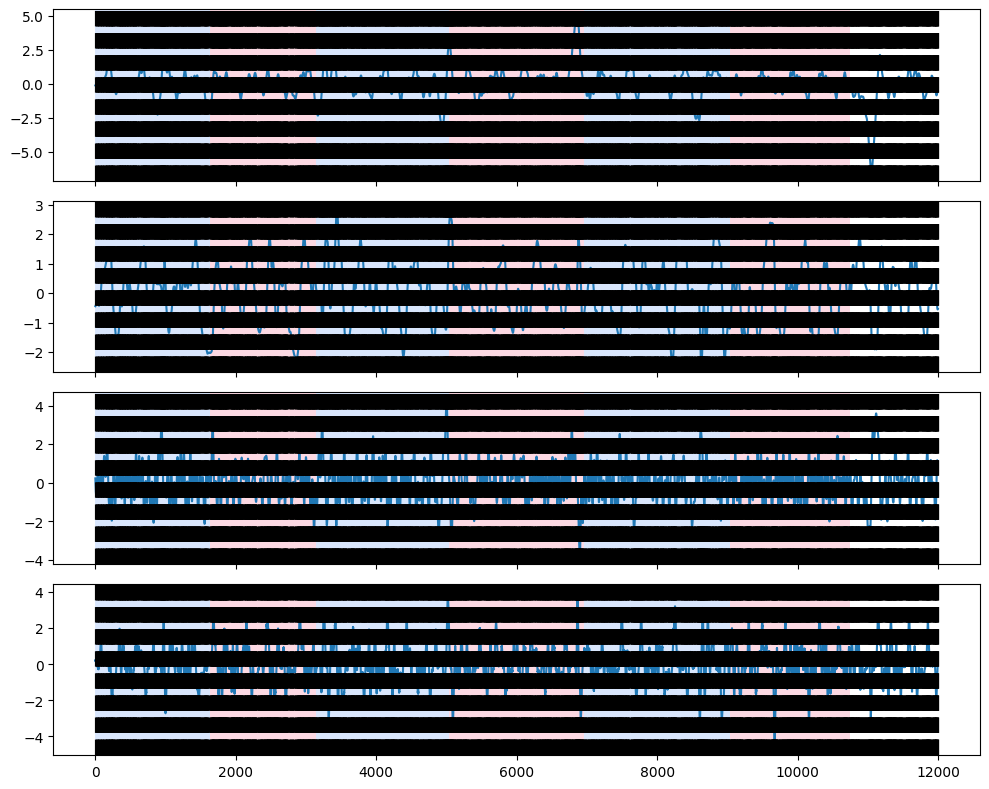

In [13]:
# Flatten the lists of change points
flattened_cps = [item for sublist in cps for item in sublist]
flattened_result = result

# display
rpt.display(X, flattened_cps, flattened_result)
plt.show()